In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = '0.3'

In [35]:
%matplotlib inline

In [2]:
arr = np.random.randint(0, 20, size=(10, 2))
arr[:6]

array([[11, 11],
       [13, 14],
       [10,  3],
       [ 2, 10],
       [ 8,  4],
       [11, 10]])

In [3]:
arr_m = arr + np.array([4, 5])
arr_m[:6]

array([[15, 16],
       [17, 19],
       [14,  8],
       [ 6, 15],
       [12,  9],
       [15, 15]])

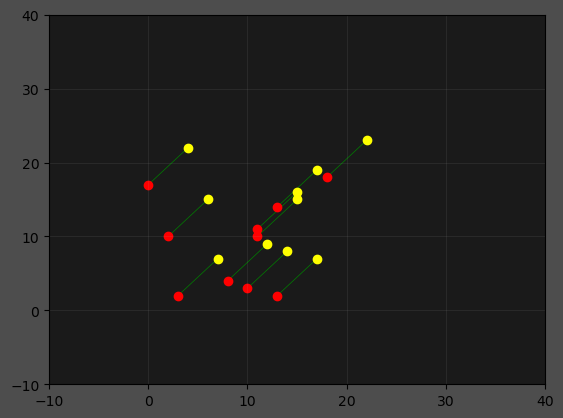

In [4]:
plt.axes().set_facecolor('0.1')
plt.scatter(arr[:, 0], arr[:, 1], c='red')
plt.scatter(arr_m[:, 0], arr_m[:, 1], c='yellow')
for i in range(len(arr)):
    plt.plot([arr[i, 0], arr_m[i, 0]], [arr[i, 1], arr_m[i, 1]],c='green',linewidth=.5, zorder=0)

plt.xlim(-10,40)
plt.ylim(-10,40)
plt.grid(alpha=0.1)
plt.show()

In [5]:
arr2 = np.random.randint(0, 10, size=(20, 3))
arr_m2 = arr2 + np.array([8, 8, 8])
arr2.shape

(20, 3)

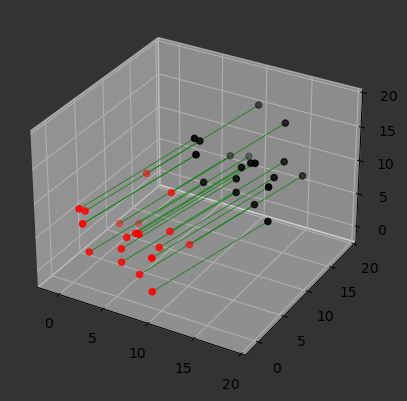

In [6]:
fig = plt.figure()
fig.patch.set_facecolor('0.2')
ax = fig.add_subplot(111, projection='3d')
ax.set_facecolor('0.2')

ax.scatter(arr2[:,0], arr2[:,1], arr2[:,2], c='red')
ax.scatter(arr_m2[:,0], arr_m2[:,1], arr_m2[:,2], c='black')
for i in range(len(arr2)):
    plt.plot([arr2[i, 0], arr_m2[i, 0]], [arr2[i, 1], arr_m2[i, 1]], [arr2[i, 2], arr_m2[i, 2]],c='g',linewidth=.5, zorder=0)

ax.set_xlim(-2, 20)
ax.set_ylim(-2, 20)
ax.set_zlim(-2, 20)
plt.show()    

In [7]:
#%matplotlib notebook

In [91]:
A = np.array([[ 1,  3],
              [-2,  0]])


vectors2 = np.c_[np.arange(-10,12, 2), np.arange(-10,12,2)].T
vectors = np.array([[-1, 4, -2,  3,  1,  2,  3, -1],
                    [ 2, 1,  2, -2,  1,  2,  3, -1]])


vectors_t = np.dot(A, vectors)
vectors2_t = np.dot(A, vectors2)
vectors2_t

array([[-40, -32, -24, -16,  -8,   0,   8,  16,  24,  32,  40],
       [ 20,  16,  12,   8,   4,   0,  -4,  -8, -12, -16, -20]])

In [96]:
vectors2_t.max()
vectors2_t[1, :].min()

-20

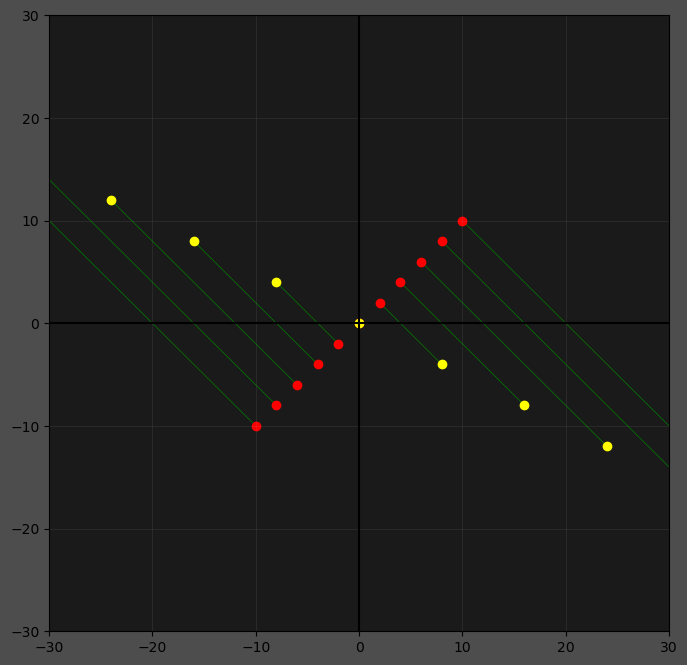

In [78]:
plt.figure(figsize=(8,8))
plt.axes().set_facecolor('0.1')
plt.scatter(vectors2[0, :], vectors2[1, :], c='red')
plt.scatter(vectors2_t[0, :], vectors2_t[1, :], c='yellow')
for i in range(vectors2.shape[1]):
    plt.plot([vectors2[0, i], vectors2_t[0, i]], [vectors2[1, i], vectors2_t[1, i]],c='green',linewidth=.5, zorder=0)

plt.axhline(y=0, color='black')
plt.axvline(x=0, color='black')
plt.xlim(-30,30)
plt.ylim(-30,30)
plt.grid(alpha=0.1)
plt.show()

In [150]:
def _2d_transform(v, M):
    
    v_t = np.dot(M, v)
    print(v)
    print(v_t)
    
    plt.figure(figsize=(8,8))
    plt.axes().set_facecolor('0.1')
    plt.scatter(v[0, :], v[1, :], c='red', zorder=2,s=80)
    plt.scatter(v_t[0, :], v_t[1, :], c='yellow', zorder=2)
    for i in range(v.shape[1]):
        plt.plot([v[0, i], v_t[0, i]], [v[1, i], v_t[1, i]],c='green',linewidth=.5, zorder=1)

    plt.axhline(y=0, color='black',zorder=0)
    plt.axvline(x=0, color='black',zorder=0)
    plt.xlim(v_t[0, :].min()-2, v_t[0, :].max()+2)
    plt.ylim(v_t[1, :].min()-2, v_t[1, :].max()+2)
    plt.grid(alpha=0.1)
    plt.show()    

[[-10  -8  -6  -4  -2   0   2   4   6   8  10]
 [-10  -8  -6  -4  -2   0   2   4   6   8  10]]
[[-40 -32 -24 -16  -8   0   8  16  24  32  40]
 [ 20  16  12   8   4   0  -4  -8 -12 -16 -20]]


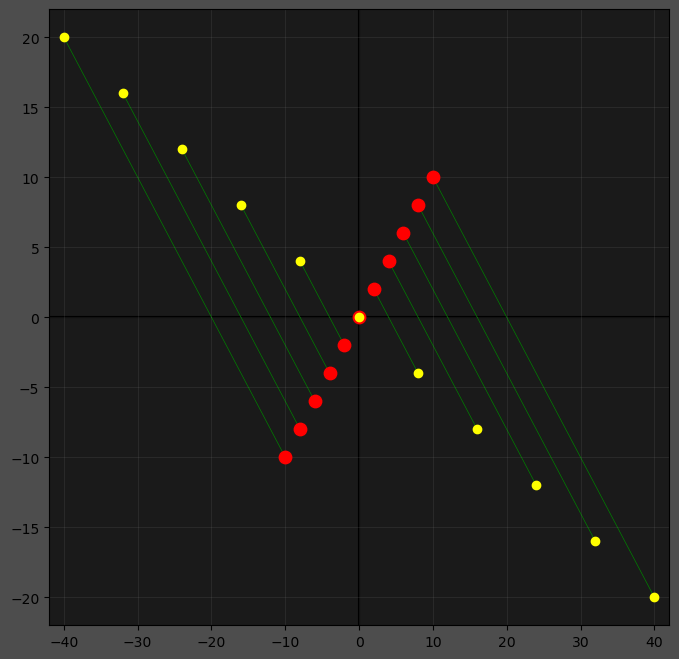

In [151]:
_2d_transform(vectors2, A)

In [152]:
M2 = np.array([[2, 0],
               [-1, 1]])

[[-10  -8  -6  -4  -2   0   2   4   6   8  10]
 [-10  -8  -6  -4  -2   0   2   4   6   8  10]]
[[-20 -16 -12  -8  -4   0   4   8  12  16  20]
 [  0   0   0   0   0   0   0   0   0   0   0]]


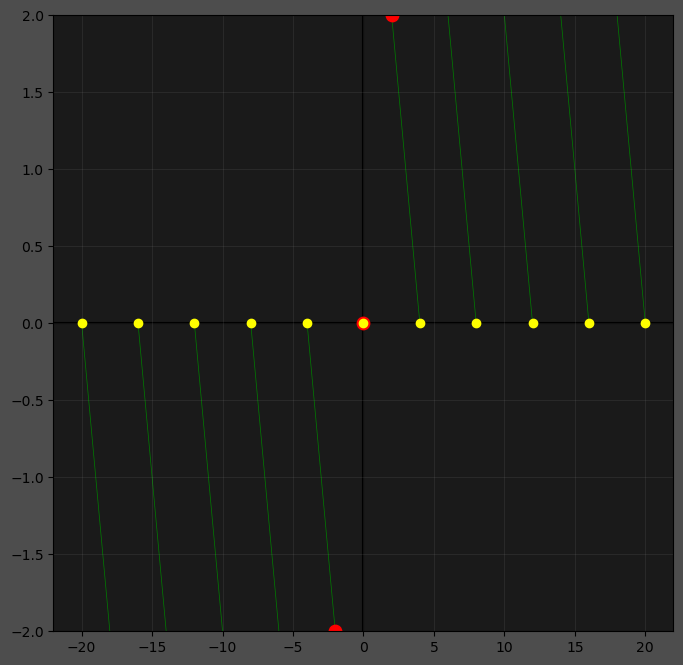

In [153]:
_2d_transform(vectors2, M2)